**This notebook involves the clustering of heart beats. We will use K-Means, & Agglomerative algorithms for clustering.**

### import required libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster, ward, dendrogram

import warnings
warnings.filterwarnings('ignore')

### Load the datasets

In [ ]:
df_train = pd.read_csv('mitbih_train.csv', header=None)
df_test = pd.read_csv('mitbih_test.csv', header=None)

In [ ]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train.shape

(87554, 188)

In [ ]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test.shape

(21892, 188)

In [ ]:
#Check data types
df_train.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
183    float64
184    float64
185    float64
186    float64
187    float64
Length: 188, dtype: object

In [ ]:
#Check data types
df_test.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
183    float64
184    float64
185    float64
186    float64
187    float64
Length: 188, dtype: object

In [ ]:
# Convert data type from float64 to float32
df_train = df_train.astype('float32')
df_test = df_test.astype('float32')

#### Let's see how our target variable distributed in our training data.

In [ ]:
#classes count
df_class=df_train[187].value_counts()
print('Count of classes :\n',df_class)
#Percentage of classes count
per_class=df_class/len(df_train)*100
print('percentage of count of classes :\n',per_class)

Count of classes :
 0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
percentage of count of classes :
 0.0    82.772917
4.0     7.345181
2.0     6.610777
1.0     2.539005
3.0     0.732120
Name: 187, dtype: float64


Text(0, 0.5, 'Index')

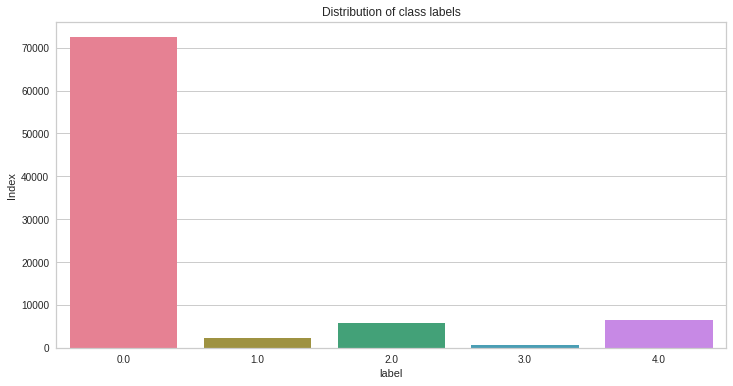

In [ ]:
#Countplot 
plt.figure(figsize=(12,6))
sns.countplot(df_train[187],palette='husl')
plt.title('Distribution of class labels')
plt.xlabel('label')
plt.ylabel('Index')

### Create features & label set

In [ ]:
# Features
x_train = df_train.drop(187, axis=1)
x_test = df_test.drop(187, axis=1)

# Labels
y_train = df_train[187]
y_test = df_test[187]

In [ ]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.807018,0.494737,0.536842,0.529825,0.491228,0.484211,0.456140,0.396491,0.284211,0.136842,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.718333,0.605000,0.486667,0.361667,0.231667,0.120000,0.051667,0.001667,0.000000,0.013333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.906122,0.624490,0.595918,0.575510,0.530612,0.481633,0.444898,0.387755,0.322449,0.191837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.858228,0.645570,0.845570,0.248101,0.167089,0.131646,0.121519,0.121519,0.118987,0.103797,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.928736,0.871264,0.804598,0.742529,0.650575,0.535632,0.394253,0.250575,0.140230,0.102299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21888,0.802691,0.692078,0.587444,0.446936,0.318386,0.189836,0.118087,0.077728,0.112108,0.152466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21889,1.000000,0.967359,0.620178,0.347181,0.139466,0.089021,0.103858,0.100890,0.106825,0.100890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21890,0.984127,0.567460,0.607143,0.583333,0.607143,0.575397,0.575397,0.488095,0.392857,0.238095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Convert labels type from float to int
y_train = y_train.astype('uint8')
y_test = y_test.astype('uint8')

In [ ]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
87549    4
87550    4
87551    4
87552    4
87553    4
Name: 187, Length: 87554, dtype: uint8

In [ ]:
y_test

0        0
1        0
2        0
3        0
4        0
        ..
21887    4
21888    4
21889    4
21890    4
21891    4
Name: 187, Length: 21892, dtype: uint8

The labels column  has 5 classes – one class is the normal heart signal and other three are different signals corresponding to different heart diseases and last category is unknown beats:

0 — Non-ectopic beats (normal beat)      
1 — Supraventricular ectopic beats        
2 — Ventricular ectopic beats      
3 — Fusion beats          
4 — Unknown beats     

['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

In [ ]:
class_names = ['N','S','V','F','Q']

### Data pre-processing

Check if any missing values

In [ ]:
df_train.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

It seems our dataset doesn't have missing values.

### Normalize the data

In [ ]:
from sklearn.preprocessing import  QuantileTransformer

In [ ]:
# Initialize Quantile Transformer
scaler =  QuantileTransformer()

In [ ]:
# Fit scaler
scaler.fit(x_train.values)

QuantileTransformer()

In [ ]:
# Transform train & test sets
df_train_scaled = scaler.transform(x_train.values)
df_test_scaled = scaler.transform(x_test.values)

In [ ]:
# Create a dataframe for scaled sets
df_train_scaled = pd.DataFrame(df_train_scaled)
df_test_scaled = pd.DataFrame(df_test_scaled)

In [ ]:
df_train_scaled

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,0.433969,0.805498,0.856509,0.631370,0.521927,0.578380,0.518885,0.329891,0.225225,0.170312,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.358556,0.596659,0.555556,0.551792,0.295029,0.400309,0.355955,0.339408,0.287035,0.307978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.228294,0.175998,0.307575,0.205756,0.136861,0.187769,0.164694,0.206634,0.159032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.257539,0.233631,0.694319,0.674195,0.631283,0.202226,0.244051,0.228910,0.255121,0.205681,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.386039,1.000000,0.962315,0.940778,0.845013,0.690834,0.500707,0.342627,0.422662,0.503739,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87549,0.139852,0.107835,0.686494,0.910412,0.907442,0.900820,0.892202,0.859549,0.736642,0.468175,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87550,0.109211,0.184317,0.599770,0.770811,0.700762,0.381164,0.170986,0.021089,0.000000,0.045243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87551,0.220731,0.199247,0.771609,0.936411,0.928491,0.899714,0.886035,0.851648,0.802236,0.593595,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87552,0.168207,0.216457,0.967326,0.635686,0.560802,0.421835,0.427140,0.440983,0.427132,0.375550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_test_scaled

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.354233,0.103160,0.000000,0.243825,0.206940,0.221736,0.187275,0.182825,0.120387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.224277,0.403063,0.676853,0.771720,0.851467,0.826690,0.797798,0.768769,0.761531,0.786029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.113114,0.054262,0.000000,0.419419,0.325434,0.308490,0.392715,0.447852,0.416647,0.457067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.749645,0.856392,0.869554,0.696222,0.169582,0.000000,0.027150,0.060086,0.190465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.082886,0.071389,0.235427,0.469994,0.000000,0.027789,0.133687,0.308968,0.272110,0.334978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.264828,0.620900,0.950341,0.972051,0.968711,0.929398,0.853295,0.669255,0.477367,0.371112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21888,0.137920,0.260634,0.761361,0.850788,0.817146,0.575294,0.416340,0.297562,0.408969,0.509650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21889,1.000000,0.924631,0.798902,0.755440,0.471193,0.252609,0.370627,0.381749,0.394944,0.366765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21890,0.463463,0.157374,0.784900,0.939522,0.959112,0.952563,0.951579,0.921754,0.867287,0.665315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Build Clustering models**

We are considering 2 algorithms for clustering, viz
* K-Means 
* Agglomerative

> **K-Means**:  
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. For this algorithm, we need to select optimum number of clusters that separates the data well.

> **Agglomerative**:      
 Agglomerative clustering is the most popular hierarchical clustering used to group objects in clusters based on their similarity. The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects. The result is a tree-based representation of the objects, named dendrogram. It doesn't requires us to specify number of clusters. It uses bottop-up approach for merging clusters.
 

### K-Means Clustering

Since the **number of target classes is 5**, we assume the **number of clusters (K) as 5**.

In [ ]:
# Initialize the K-Means
kmeans_model  = KMeans(n_clusters = 5, random_state=42)
# Fit model
kmeans_model.fit(df_train_scaled.values)

KMeans(n_clusters=5, random_state=42)

### Predict clusters on test data

In [ ]:
y_pred_cluster = kmeans_model.predict(x_test.values)

In [ ]:
y_pred_cluster

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

### Distribution of classes in test data

Text(0, 0.5, 'Index')

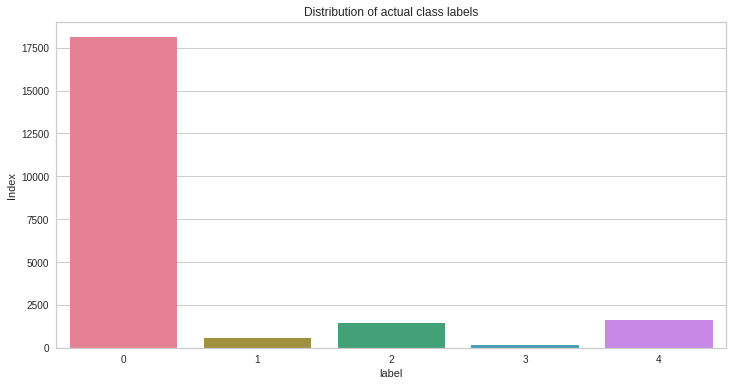

In [ ]:
#Countplot 
plt.figure(figsize=(12,6))
sns.countplot(y_test, palette='husl')
plt.title('Distribution of actual class labels')
plt.xlabel('label')
plt.ylabel('Index')

### Distribution of K-Means clusters predicted in test data

In [ ]:
df_kmeans =df_test_scaled
df_kmeans['cluster'] = y_pred_cluster

In [ ]:
df_kmeans

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,cluster
0,1.000000,0.354233,0.103160,0.000000,0.243825,0.206940,0.221736,0.187275,0.182825,0.120387,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.224277,0.403063,0.676853,0.771720,0.851467,0.826690,0.797798,0.768769,0.761531,0.786029,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
2,0.113114,0.054262,0.000000,0.419419,0.325434,0.308490,0.392715,0.447852,0.416647,0.457067,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,1.000000,0.749645,0.856392,0.869554,0.696222,0.169582,0.000000,0.027150,0.060086,0.190465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.082886,0.071389,0.235427,0.469994,0.000000,0.027789,0.133687,0.308968,0.272110,0.334978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21887,0.264828,0.620900,0.950341,0.972051,0.968711,0.929398,0.853295,0.669255,0.477367,0.371112,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
21888,0.137920,0.260634,0.761361,0.850788,0.817146,0.575294,0.416340,0.297562,0.408969,0.509650,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
21889,1.000000,0.924631,0.798902,0.755440,0.471193,0.252609,0.370627,0.381749,0.394944,0.366765,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
21890,0.463463,0.157374,0.784900,0.939522,0.959112,0.952563,0.951579,0.921754,0.867287,0.665315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


Text(0, 0.5, 'Index')

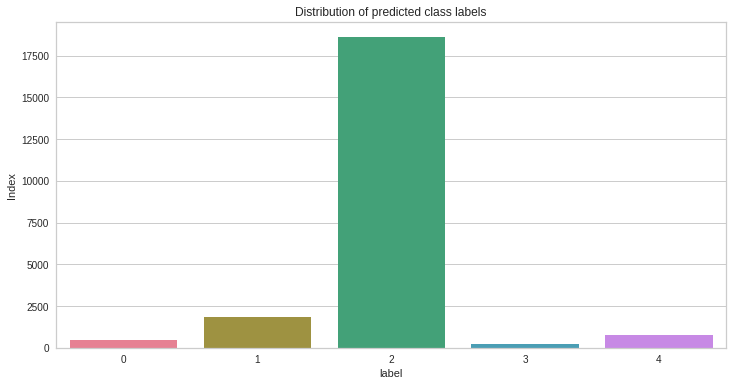

In [ ]:
#Countplot 
plt.figure(figsize=(12,6))
sns.countplot(df_kmeans.cluster, palette='husl')
plt.title('Distribution of predicted class labels')
plt.xlabel('label')
plt.ylabel('Index')

In [ ]:
# Evaluate K-means model
from sklearn.metrics.cluster import fowlkes_mallows_score

In [ ]:
fow_ma_score = fowlkes_mallows_score(y_test, df_kmeans['cluster'])
fow_ma_score

0.7650430590476173

Insights:
* It seems performance of K-Means is good but not great due to the presence of wrongly clustered signals.
* We can see some signals grouped wrongly in cluster 2 & 4.

### Agglomerative Clustering

In [ ]:
# Initialize Agglomerative Clustering
clf = AgglomerativeClustering(n_clusters=None, distance_threshold = 0)

# Fit data
clf.fit(df_train_scaled.values)

MemoryError: Unable to allocate 28.6 GiB for an array with shape (3832807681,) and data type float64